# UC San Diego: Data Science in Practice
## McDonalds Ratings Data Analysis

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Hailey Nguyen

- U Lam Lou

- Brianda Plascencia

- Eliel Granados Jimenez

# Video Presentation:

link: https://www.youtube.com/watch?v=ZtEHVwxuiZI

# Overview

The analysis of McDonald's customer reviews and customer satistfaction led to acquire important experiences into the variables that add to client appraisals and to investigate the connections between client care, food quality, population density, and consumer satisfaction across various states. In order to accomplish this, extensive data wrangling and cleaning procedures were carried out to guarantee the data's accuracy and dependability. An exploratory data analysis (EDA) was carried out to discover relationships, trends, and patterns within the dataset after the data had been cleaned.
The objective of the analysis was to offer insights that could be put into action and assist McDonald's in enhancing the overall customer experience, increasing customer satisfaction, and optimizing their service. By understanding the variables that impact client appraisals, McDonald's can go with information driven choices to address any worries, further develop administration quality, and cultivate client dependability. By leading this investigation, we can acquire a more profound comprehension of the variables adding to client evaluations and how they shift across various states. This data can be used by McDonald's to tailor their techniques in view of the exceptional inclinations and assumptions for clients in different areas. Generally, the investigation looked to overcome any barrier between client criticism and noteworthy experiences, empowering McDonald's to settle on informed choices to work on their contributions and keep up with their situation as a main food chain.

<a id='research_question'></a>
# Research Question

* What factors can be responsible for such discrepancies (customer service, cleanliness, food quality, highly populated states vs low populated states) in the ratings of restaurants where all products are standardized, such as McDonalds, throughout the US?


<a id='background'></a>

## Background & Prior Work

Fast-food restaurants such as McDonalds, Burger King, Taco Bell are places that offer customers standardized products using the least amount of time in a cheaper price compared to regular restaurants. Even though the products are standardized, we found out there is a huge difference in ratings for the same brand and the customers’ rating for each restaurant varies too. According to Yelp, the 1-star and 5 stars comments given by customers for a 1.5 stars McDonald’s in California are mainly related to customer service then food. (1) In this project, we will investigate more insight into McDonald’s in the United States and understand factors that cause such discrepancies in the ratings of those restaurants.


A study, A Study on Factors Affecting Customer Satisfaction at McDonald’s Restaurants, in 2022 mentioned that except for customer service, cleanliness, quality of food, and timeliness might also contribute to Customer Satisfaction at McDonald’s. (2) Based on their research, we would like to see other than the factors that have been examined, the population in respect to state will also be an important factor that affects the customer rating of McDonald’s in the United States too.



References (include links):
- 1) https://www.yelp.com/biz/mcdonalds-camp-pendleton-2?osq=McDonald%27s&rr=1

- 2) http://www.ejournal.aibpmjournals.com/index.php/IJTHAP/article/view/1398

# Hypothesis


Our hypothesis is that customer service and food quality are important factors that determine a customer’s McDonalds rating. Population with respect to state is also a factor that determines the rating of McDonalds by customers.

# Dataset(s)

- Dataset Name: McDonald’s Store Reviews
- Link to the dataset: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews
- Number of observations: 33396

This dataset has more than 30000 reviews from customers about McDonald's located in different store addresses. The rating is in terms of stars (highest 5, lowest 1) and includes text reviews and when the reviews are posted.

# Ethics & Privacy

Our team has thoroughly discussed the issues of data being used
unethically and the usage of personal data being a violation of privacy
and being dangerous. We have noted that such data must be removed and
not used if found. However, most of our data is pulled from Kaggle and
due to Kaggle's public datasets that can be utilized by anyone no PII
should be found in these datasets. In the case if such information is
found, it will be removed from the data and not be used.

# Data Wrangling

The underlying step of the examination included information finding, where the crude dataset was handled, cleaned, and arranged to guarantee consistency and precision. Missing qualities, copies, and immaterial data were addressed to set up the information for additional investigation.

Imported packages

In [1]:
import numpy as np 
import pandas as pd 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns
import collections
from collections import Counter
!pip install pandas matplotlib wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


# Data Cleaning

* Cleaning data to find targeted data set.
* Grouping of data by state, store address, and rating count in order to calculate mean ratings and investigate variations between states.

In [2]:
# Reading in data (csv).
data = pd.read_csv('encoded-McDonald_s_Reviews.csv')

In [3]:
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [4]:
# Create column with name of the city.
data['City'] = data['store_address'].str.extract(r',\s*([^,]+),\s*')

In [5]:
# Create column with name of the State.
data['State'] = data['store_address'].str.extract(r',\s*([^,]+),\s*([^,]+)\s+\d{5},\s*')[1]

In [6]:
data.drop(['category', 'store_name','reviewer_id'], axis=1, inplace = True)

In [7]:
data = data.drop(data.columns[[1,2]], axis = 1)

In [8]:
# Function to remove special characters.
def remove_special_characters(text):
    # Define the regular expression pattern to match any non-alphanumeric characters
        pattern = r'[^a-zA-Z0-9\s]'
    # Use re.sub() to replace any non-alphanumeric characters with an empty string
        cleaned_text = re.sub(pattern, '', text)
        return cleaned_text.lower()

In [9]:
# Cleaned the review column from special characters.
data['review_cleaned'] = data['review'].apply(remove_special_characters)

In [10]:
data.drop(['review'], axis=1, inplace = True)

In [11]:
# Converted rating column to numeric values.
data['rating'] = data['rating'].str.replace('stars','')
data['rating'] = data['rating'].str.replace('star','')
data['rating'] = pd.to_numeric(data['rating'])

In [12]:
data['rating_count'] = data['rating_count'].str.replace(',','')
data['rating_count'] = pd.to_numeric(data['rating_count'])

In [13]:
data

,store_address,rating_count,review_time,rating,City,State,review_cleaned
0,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,3 months ago,1,Austin,TX,why does it look like someone spit on my food\...
1,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,5 days ago,4,Austin,TX,itd mcdonalds it is what it is as far as the f...
2,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,5 days ago,1,Austin,TX,made a mobile order got to the speaker and che...
3,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,a month ago,5,Austin,TX,my mc crispy chicken sandwich was customer se...
4,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,2 months ago,1,Austin,TX,i repeat my order 3 times in the drive thru an...
...,...,...,...,...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,4 years ago,1,Miami,FL,they treated me very badly
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,a year ago,5,Miami,FL,the service is very good
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,a year ago,4,Miami,FL,to remove hunger is enough
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,5 years ago,5,Miami,FL,its good but lately it has become very expensive


# Data Visualization

In [14]:
data

,store_address,rating_count,review_time,rating,City,State,review_cleaned
0,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,3 months ago,1,Austin,TX,why does it look like someone spit on my food\...
1,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,5 days ago,4,Austin,TX,itd mcdonalds it is what it is as far as the f...
2,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,5 days ago,1,Austin,TX,made a mobile order got to the speaker and che...
3,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,a month ago,5,Austin,TX,my mc crispy chicken sandwich was customer se...
4,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,2 months ago,1,Austin,TX,i repeat my order 3 times in the drive thru an...
...,...,...,...,...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,4 years ago,1,Miami,FL,they treated me very badly
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,a year ago,5,Miami,FL,the service is very good
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,a year ago,4,Miami,FL,to remove hunger is enough
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,5 years ago,5,Miami,FL,its good but lately it has become very expensive


# Data Analysis & Results


In our hypothesis, we suggested that population could be one of the factors that responsible for such discrepancies in ratings. Therefore, we first used the groupby method to group the data of 'State', 'store_address', and 'rating_count' and calculated the mean value of the rating counts in each states. Then, we plot it into a bar chart to see which state has the most population.



In [15]:
# Group data by state and store address in order to get total rating counts per state.
state_rating_count = data.groupby(['State','store_address'])['rating_count'].agg(['mean']).astype(int)
state_rating_count

mean
State store_address                                            
CA    10451 Santa Monica Blvd, Los Angeles, CA 90025,...   2251
      10901 Riverside Dr, North Hollywood, CA 91602, ...   1794
      1121 Garnet Ave, San Diego, CA 92109, United St...   1159
      1540 2nd St, Santa Monica, CA 90405, United States   3380
      501 W Imperial Hwy, Los Angeles, CA 90044, Unit...   2722
      550 Lawrence Expy, Sunnyvale, CA 94086, United ...   1562
      5920 Balboa Ave, San Diego, CA 92111, United St...    550
      690 Alameda St, Los Angeles, CA 90021, United S...   2614
DC    1916 M St NW, Washington, DC 20036, United States    1269
      555 13th St NW, Washington, DC 20004, United St...   1542
FL    11382 US-441, Orlando, FL 32837, United States       1861
      1415 E State Rd, Fern Park, FL 32730, United St...   1617
      1650 Washington Ave, Miami Beach, FL 33139, Uni...   4922
      3501 Biscayne Blvd, Miami, FL 33137, United States   2809
      5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL...   5566
      6875 Sand Lake Rd, Orlando, FL 32819, United St...  19671
      9814 International Dr, Orlando, FL 32819, Unite...   5467
IL    111 Madison St, Oak Park, IL 60302, United States    1454
NJ    621 Broadway, Newark, NJ 07104, United States        1564
      702-2 Haddonfield-Berlin Rd, Voorhees Township,...    933
NV    By Mandalay Bay, 3999 S Las Vegas Blvd, Las Veg...   2365
NY    1044 US-11, Champlain, NY 12919, United States       1306
      114 Delancey St, New York, NY 10002, United States   2348
      151 West 34th Street (Macy's 7th Floor, New Yor...    263
      160 Broadway, New York, NY 10038, United States      5186
      262 Canal St, New York, NY 10013, United States      3196
      429 7th Ave, New York, NY 10001, United States       2052
      490 8th Ave, New York, NY 10001, United States       3902
      72-69 Kissena Blvd, Queens, NY 11367, United St...   2193
      724 Broadway, New York, NY 10003, United States      1670
PA    1698 US-209, Brodheadsville, PA 18322, United S...   1028
TX    1100 N US Hwy 377, Roanoke, TX 76262, United St...    998
      13749 US-183 Hwy, Austin, TX 78750, United States    1240
      2400 Alliance Gateway Fwy, Fort Worth, TX 76177...    957
      25200 I-10 Lot 2, San Antonio, TX 78257, United...   1460
      632 S R L Thornton Freeway Service Rd, Dallas, ...   2657
      8500 US-290, Austin, TX 78724, United States         1406
UT    210 5th S, Salt Lake City, UT 84106, United States   3243
VA    7010 Bradlick Shopping Center, Annandale, VA 22...    595

In [16]:
# Compute sum of rating count per state.
state_rating_count = state_rating_count.groupby('State')['mean'].sum()
state_rating_count = state_rating_count.to_frame().reset_index()
state_rating_count = state_rating_count.rename(columns={'mean': 'Sum'})
state_rating_count

,State,Sum
0,CA,16032
1,DC,2811
2,FL,41913
3,IL,1454
4,NJ,2497
5,NV,2365
6,NY,22116
7,PA,1028
8,TX,8718
9,UT,3243


Text(0, 0.5, 'Sum Ratings')

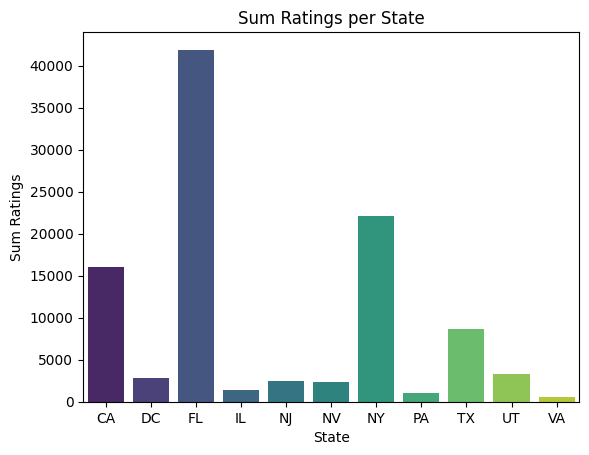

In [17]:
# Plot histogram of all states with respects to the sum of their rating counts.
sns.barplot(x='State', y='Sum', data=state_rating_count, palette='viridis')
plt.title('Sum Ratings per State')
plt.xlabel('State')
plt.ylabel('Sum Ratings')

From the Sum Rating per State graph, we can see that Florida has the most population, then new york and california. To prove our hypothesis, we would like to know the mean ratings of the Mcdonalds of each state. If Florida, New York, and California shows that they have the lowest rating in Mcdonals, it can prove that states with higher population will affect the Mcdonalds ratings from the customers.

In [18]:
state_rating_avg = data.groupby(['State','store_address'])['rating'].agg(['mean']).astype(float)
state_rating_avg

mean
State store_address                                               
CA    10451 Santa Monica Blvd, Los Angeles, CA 90025,...  3.666667
      10901 Riverside Dr, North Hollywood, CA 91602, ...  3.377193
      1121 Garnet Ave, San Diego, CA 92109, United St...  2.817647
      1540 2nd St, Santa Monica, CA 90405, United States  3.192683
      501 W Imperial Hwy, Los Angeles, CA 90044, Unit...  2.492723
      550 Lawrence Expy, Sunnyvale, CA 94086, United ...  3.330000
      5920 Balboa Ave, San Diego, CA 92111, United St...  3.598182
      690 Alameda St, Los Angeles, CA 90021, United S...  3.074545
DC    1916 M St NW, Washington, DC 20036, United States   3.598529
      555 13th St NW, Washington, DC 20004, United St...  2.666667
FL    11382 US-441, Orlando, FL 32837, United States      3.164789
      1415 E State Rd, Fern Park, FL 32730, United St...  3.470588
      1650 Washington Ave, Miami Beach, FL 33139, Uni...  1.971930
      3501 Biscayne Blvd, Miami, FL 33137, United States  2.557962
      5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL...  2.810465
      6875 Sand Lake Rd, Orlando, FL 32819, United St...  3.687755
      9814 International Dr, Orlando, FL 32819, Unite...  2.579894
IL    111 Madison St, Oak Park, IL 60302, United States   3.362184
NJ    621 Broadway, Newark, NJ 07104, United States       2.993023
      702-2 Haddonfield-Berlin Rd, Voorhees Township,...  3.615058
NV    By Mandalay Bay, 3999 S Las Vegas Blvd, Las Veg...  2.978641
NY    1044 US-11, Champlain, NY 12919, United States      3.269355
      114 Delancey St, New York, NY 10002, United States  3.333333
      151 West 34th Street (Macy's 7th Floor, New Yor...  1.916667
      160 Broadway, New York, NY 10038, United States     2.333333
      262 Canal St, New York, NY 10013, United States     3.125926
      429 7th Ave, New York, NY 10001, United States      3.692105
      490 8th Ave, New York, NY 10001, United States      2.959770
      72-69 Kissena Blvd, Queens, NY 11367, United St...  3.285965
      724 Broadway, New York, NY 10003, United States     3.312281
PA    1698 US-209, Brodheadsville, PA 18322, United S...  3.463035
TX    1100 N US Hwy 377, Roanoke, TX 76262, United St...  3.465753
      13749 US-183 Hwy, Austin, TX 78750, United States   3.192500
      2400 Alliance Gateway Fwy, Fort Worth, TX 76177...  3.270588
      25200 I-10 Lot 2, San Antonio, TX 78257, United...  3.127559
      632 S R L Thornton Freeway Service Rd, Dallas, ...  3.143636
      8500 US-290, Austin, TX 78724, United States        2.666307
UT    210 5th S, Salt Lake City, UT 84106, United States  2.525843
VA    7010 Bradlick Shopping Center, Annandale, VA 22...  3.697674

In [19]:
state_rating_avg = state_rating_avg.groupby('State')['mean'].mean()
state_rating_avg = state_rating_avg.to_frame().reset_index()
state_rating_avg 

,State,mean
0,CA,3.193705
1,DC,3.132598
2,FL,2.891912
3,IL,3.362184
4,NJ,3.304041
5,NV,2.978641
6,NY,3.025415
7,PA,3.463035
8,TX,3.144391
9,UT,2.525843


Text(0, 0.5, 'Mean Ratings')

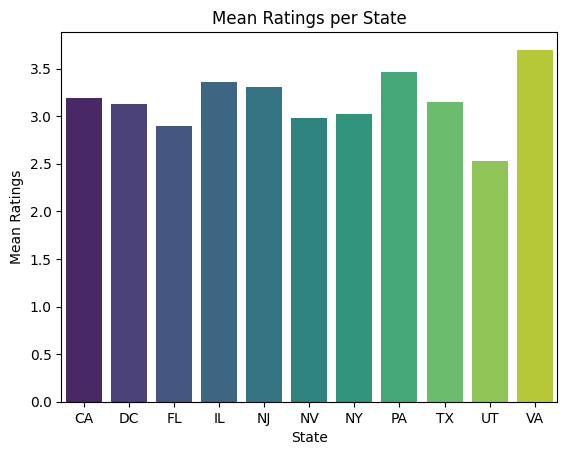

In [20]:
sns.barplot(x='State', y='mean', data=state_rating_avg, palette='viridis')
plt.title('Mean Ratings per State')
plt.xlabel('State')
plt.ylabel('Mean Ratings')


Surprisingly, we noticed that Florida has the second lowest rating for the Mcdonalds, Utah has the lowest. We also found out that some states that we originally thought to be having high ratings due to the less dense popultion have low ratings. After investigation, we realized the reason causing this exception is because for Utah and some states, they only have ratings of one address included in the dataset compared to Florida which has 7 stores. Thus, excluding this exception, Florida has the lowest rating.

We made a stack plot to visualize which state has the highest number of ratings and how the ratings are distrubuted per state.



In [21]:
state_rating_count = data.groupby(['State','rating'])['rating'].agg(['count']).astype(int).reset_index()
state_rating_count

,State,rating,count
0,CA,1,1486
1,CA,2,520
2,CA,3,812
3,CA,4,989
4,CA,5,1787
5,DC,1,101
6,DC,2,50
7,DC,3,122
8,DC,4,162
9,DC,5,248


<Figure size 1000x600 with 0 Axes>

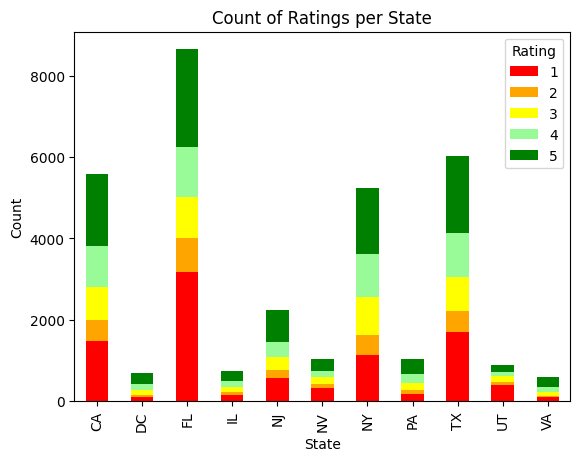

In [22]:
pivot_data = state_rating_count.pivot(index='State', columns='rating', values='count').fillna(0)

plt.figure(figsize=(10, 6)) 
colors = ['red','orange', 'yellow', 'palegreen', 'green']

pivot_data.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Ratings per State')

plt.legend(title='Rating')
plt.show()

Based on the stacked bar plot, we noticed that some states have less ratings regarding to the Mcdonlds. Thus, we would like to have a clearer look at the distrubution of the ratings in all the states and investigate how population might affect the ratings given by customers in each states. We created 11 subplots to show the counts of different ratings (1-5) in the 11 different states such that we could have a more direct view how population might affect the Mcdonalds ratings in a state.

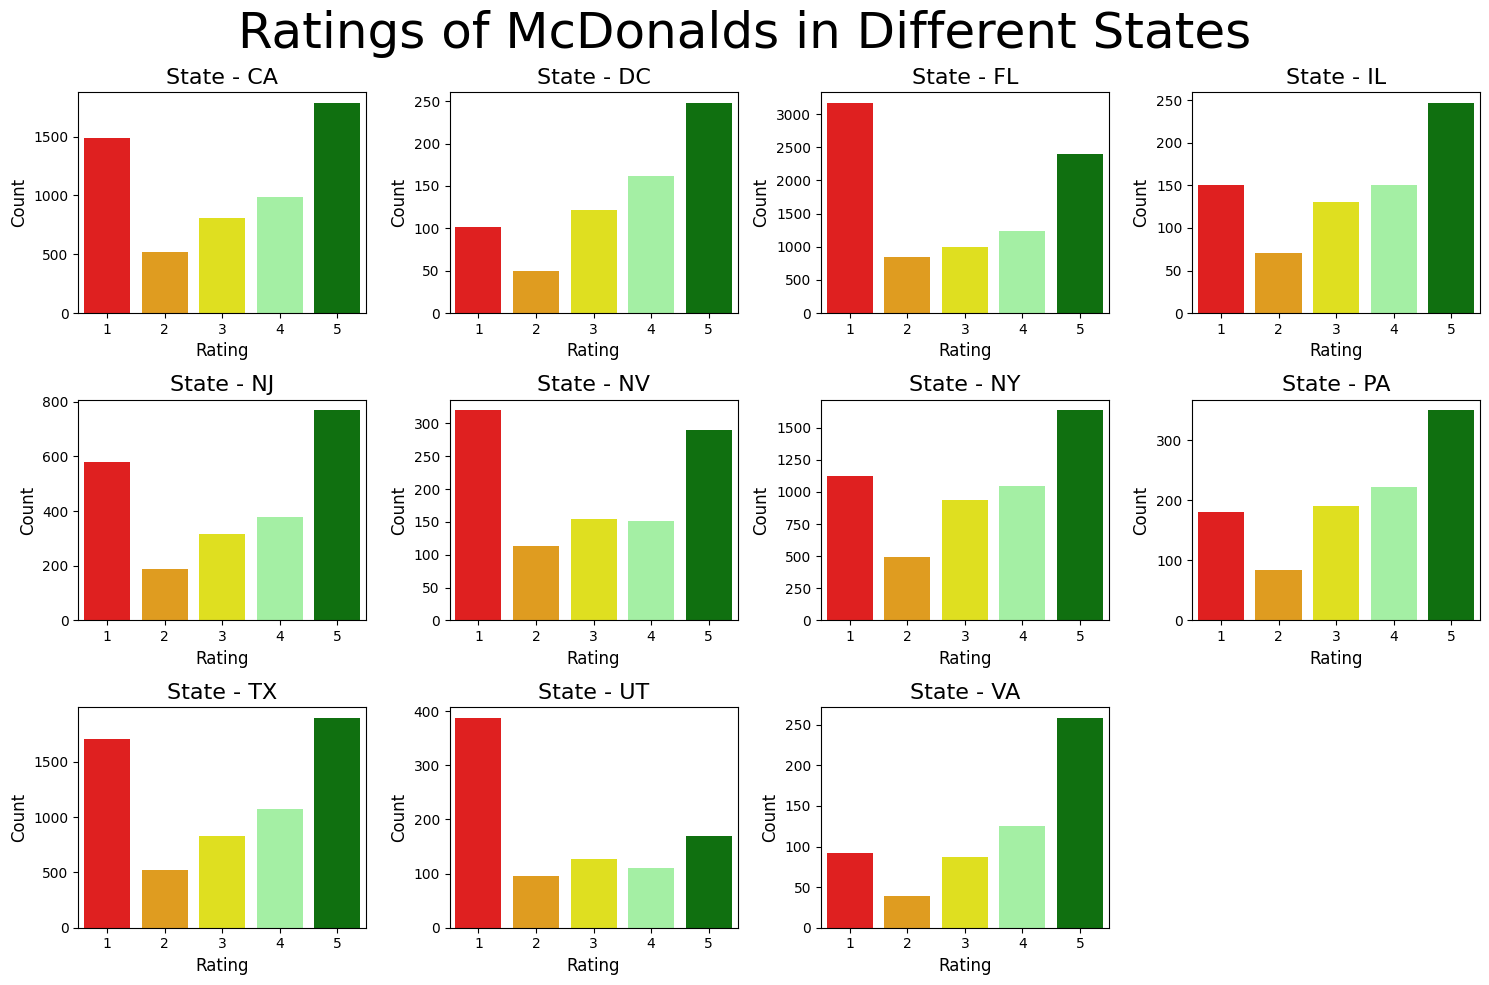

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Ratings of McDonalds in Different States', fontsize=36)

# Create a list of the states from the index in pivot_data
states = pivot_data.index
# Setting the list of colors for the ratings
bar_color = ['red', 'orange', 'yellow', 'palegreen', 'green']
# Showing bar graphs counting the number of rating 1-5 for Mcdonalds reviews in each the states 
for i, state in enumerate(states):
    row = i // 4 
    col = i % 4  
    ratings = pivot_data.loc[state, 1:5] 
    sns.barplot(x=ratings.index, y=ratings.values, palette = bar_color, ax=axes[row, col])
    axes[row, col].set_title(f'State - {state}', fontsize = 16)
    axes[row, col].set_xlabel('Rating', fontsize = 12)
    axes[row, col].set_ylabel('Count', fontsize = 12)
    
# Remove the empty subplot
for i in range(len(states), 12):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In this section, we would like to comparing the word frequency appears in the reviews when the customers are giving ratings to the McDonalds and see 10 most common words that has a relationship with ratings.

In [24]:
nltk.download('stopwords')
# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove(reviews):
    words = reviews.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Remove stopwords from the 'review_cleaned' column
data['review_cleaned'] = data['review_cleaned'].apply(remove)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


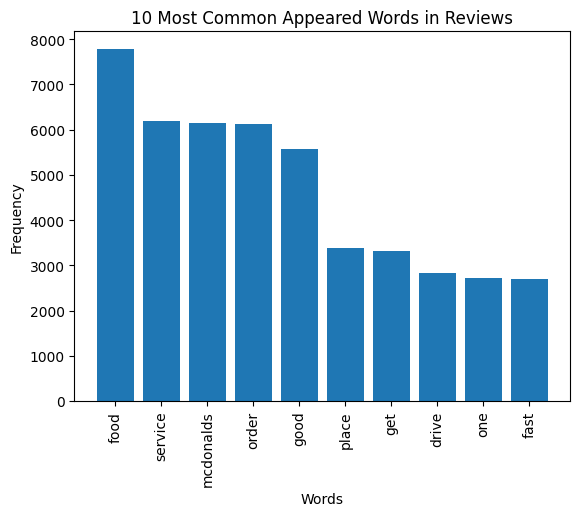

In [25]:
def clean_text(review):
    review = review.lower()
    review = re.sub(r'[^\w\s]', '', review)
    return review

data['review_cleaned'] = data['review_cleaned'].apply(clean_text)

def tokenize_text(review):
    return review.split()

data['reviews'] = data['review_cleaned'].apply(tokenize_text)

# Count the number of times each word appears in the 'review_cleaned' column in data
frequency_w = Counter()
for i in data['reviews']:
    frequency_w.update(i)

# Count words based on number of time they appear (frequency) and sort in descending order.
sorted_fw = dict(sorted(frequency_w.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart to visualize the word frequencies
most_appears = list(sorted_fw.keys())[:10]  # View top 10 words.
counts = [sorted_fw[word] for word in most_appears]

plt.bar(range(len(most_appears)), counts)
plt.xticks(range(len(most_appears)), most_appears, rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('10 Most Common Appeared Words in Reviews')
plt.show()

From the 10 Most Common Appeared Words in Reviews bar graph, we can see that food and service has strong relationship when it comes to rating the McDonalds in the States.

In [26]:
data

,store_address,rating_count,review_time,rating,City,State,review_cleaned,reviews
0,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,3 months ago,1,Austin,TX,look like someone spit food normal transaction...,"[look, like, someone, spit, food, normal, tran..."
1,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,5 days ago,4,Austin,TX,itd mcdonalds far food atmosphere go staff mak...,"[itd, mcdonalds, far, food, atmosphere, go, st..."
2,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,5 days ago,1,Austin,TX,made mobile order got speaker checked line mov...,"[made, mobile, order, got, speaker, checked, l..."
3,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,a month ago,5,Austin,TX,mc crispy chicken sandwich customer service qu...,"[mc, crispy, chicken, sandwich, customer, serv..."
4,"13749 US-183 Hwy, Austin, TX 78750, United States",1240,2 months ago,1,Austin,TX,repeat order 3 times drive thru still manage m...,"[repeat, order, 3, times, drive, thru, still, ..."
...,...,...,...,...,...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,4 years ago,1,Miami,FL,treated badly,"[treated, badly]"
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,a year ago,5,Miami,FL,service good,"[service, good]"
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,a year ago,4,Miami,FL,remove hunger enough,"[remove, hunger, enough]"
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",2810,5 years ago,5,Miami,FL,good lately become expensive,"[good, lately, become, expensive]"


We want to see if there is a connection between positive and negatives words in regards to how a McDonalds is rated (1-5). We created a model to give us insight to whether specific words can predict how a customer will rate the McDonalds that they were served at.

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words
data['reviews'] = data['reviews'].apply(lambda x: ' '.join([word for word in x if word not in stop_words]))

# Splitting the dataset
X = data['reviews']
y = data['rating'] > 2  # Consider ratings 3, 4 and 5 as high ratings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train  model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# See prediction
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

       False       0.85      0.84      0.84      2543
        True       0.90      0.91      0.90      4137

    accuracy                           0.88      6680
   macro avg       0.88      0.87      0.87      6680
weighted avg       0.88      0.88      0.88      6680



We want to take a look at a Confusion Matrix to give us insight on how wekk the performance of model did with our test data. Below is displayed true positives (TP), true negatives (TN), false positives (FP) and fales negatives (FN) that were produced by the model.

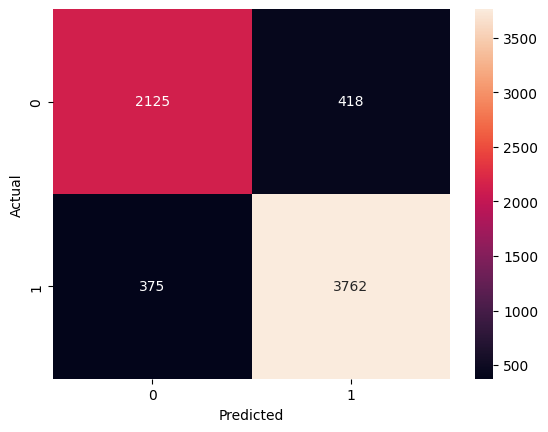

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We want to see how well our Logistic Regressio model did in regards to classifying our data with respects to ratings and customer reviews. Since we got a score that is above 0.90 we can assume that our model can classify and make predictions rather well (excellent discrimination).

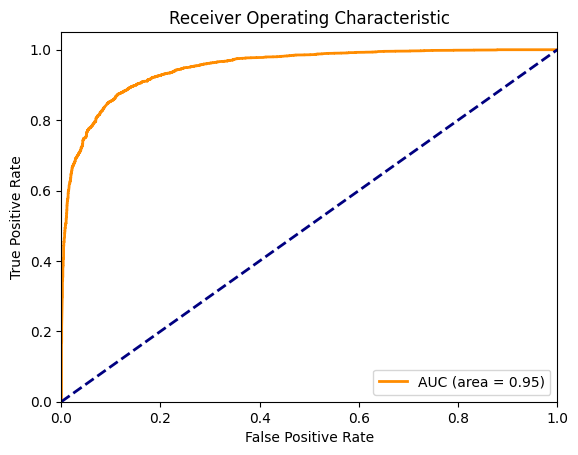

In [29]:
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Here, we are taking a look at the top positive words that were used that produced high ratings.

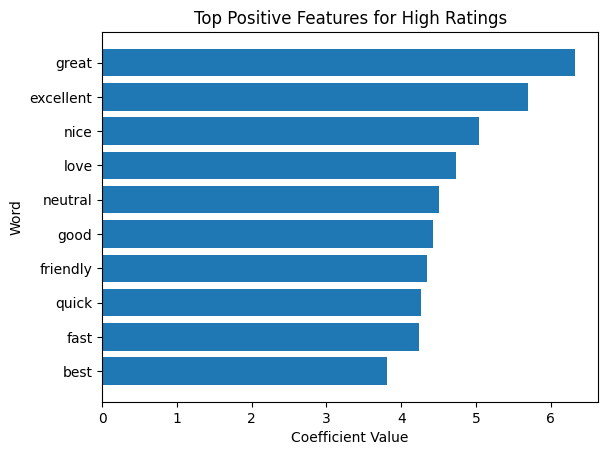

In [30]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coef = model.coef_[0]

top_positive_indices = np.argsort(coef)[-10:]  # Get indices of top positive features
top_positive_words = [feature_names[i] for i in top_positive_indices]

plt.barh(top_positive_words, coef[top_positive_indices])
plt.xlabel('Coefficient Value')
plt.ylabel('Word')
plt.title('Top Positive Features for High Ratings')
plt.show()

# Conclusion & Discussion

## Limitations: 

* While the analysis gave significant bits of knowledge, recognizing its limitations is fundamental. The dataset may not fully represent all McDonald's locations in the United States, which is one limitation. The information utilized in the examination may be one-sided towards specific areas or areas with more customer reviews. In this way, the outcomes probably won't be actually generalizable to every one of McDonald's cafés. The absence of key variables that could influence customer ratings, such as specific menu items, promotional offers, or pricing, is another limitation. Including such information could give a more thorough comprehension of the variables impacting consumer loyalty. Moreover, the investigation zeroed in on the printed content of client surveys disregarding the feeling of the audits. Having more data could give further insight into the general opinion of clients towards McDonald’s, considering a more nuanced understanding of client criticism.

## Future Directions:

* To expand on this analysis, future exploration could consolidate feeling investigation to acquire a more top to bottom comprehension of client opinion towards McDonald’s. Opinion investigation could uncover the most often referenced words as well as the general feeling related with those words, like good or pessimistic. Besides, growing the dataset to incorporate more different areas and cafés could work on the generalizability of the discoveries. Counting information from various sorts of McDonald's foundations, for example, drive-push, independent cafés, and those situated inside shopping centers, could give bits of knowledge into how client encounters shift across various arrangements. Ultimately, leading studies or gathering input from clients straightforwardly could offer more designated and explicit experiences into the variables influencing client evaluations. Joining quantitative information from studies with subjective information from client surveys could give a more thorough image of consumer loyalty and help McDonald's designer its methodologies likewise. We would like to also include McDonalds rating data in other countries and also compare the results we found with a few more ratings from different restaurants such as Burger King, Arby's, and Wendy's which is sells similar products.



## Conclusion:

* Our model showed that positive words that were used to describe customer satisfaction/experience is connected to how a customer will rate the McDonalds facility in which they were served. 

* A deeper comprehension of the connection between customer service, food quality, population density, and customer satisfaction across various states was provided by the analysis, which provided several useful insights into the factors that influence customer ratings. One astounding finding was that population density didn't display an immediate relationship with higher evaluations. At first, it was speculated that states with higher population density could have lower evaluations because of potential congestion and administration shortcomings. Nonetheless, the outcomes showed that a few states with lower population had higher mean evaluations, while additional crowded states like Florida had lower mean evaluations. This proposes that factors other than population density, like help quality, menu contributions, and the executives rehearses, are possibly more persuasive in deciding consumer satisfaction. This insight was further supported by the stack plot visualization, which showed how different states had different numbers of ratings. A few states had essentially less evaluations contrasted with others, which could slant the mean appraisals for those states. In this manner, it is fundamental to consider the example size while looking at client evaluations between states. A bigger example size is probably going to give a more exact portrayal of client feeling. 


* The outcome proposes that consumer satisfaction is impacted by a huge number of elements, and there is no straightforward, one-size-fits-all clarification for evaluations across various states. McDonald's ought to zero in on giving steady great help, drawing in with client criticism, and ceaselessly working on its contributions to measure up to the different assumptions of its clients across different areas.


* In general, the analysis presumes that client care and food quality are vital variables impacting client evaluations at McDonald’s. While population density didn't straightforwardly influence evaluations, different elements assumed a more critical part in deciding consumer loyalty. The fact that ratings were not always higher in states with more people does not necessarily mean that the quality of the food and service is more important for keeping customers coming back.

# Team Contribution

* U Lam Lou: Worked on Background & Prior Work and analysis section. Wrote code for data visualization.
* Hailey Nguyen: Wrote conclusion and overview. Helped with editing final notebook.
* Eliel Jimenez: Wrote code for graphs, edited notebook, and wrote the research question.
* Brianda Plascencia: Wrote Ethics and Privacy. Helped with building model and creating graphs.